<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/Dog_Breed_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook

In [2]:
import fastbook

In [3]:
fastbook.setup_book()

Mounted at /content/gdrive


In [4]:
!pip install utils

In [5]:
from fastai.vision.all import *
from utils import *

In [6]:
path = untar_data(URLs.PETS)

In [7]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [8]:
images = (path/'images').ls()

In [9]:
images

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_128.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_84.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_174.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_143.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_170.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_55.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/keeshond_11.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_71.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_252.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_138.jpg')...]

In [10]:
fnname = images[0]

In [11]:
fnname

Path('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_128.jpg')

In [12]:
file = (path/'images').ls()

In [13]:
fname = file[0]

In [14]:
fname

Path('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_128.jpg')

In [15]:
#re.findall(r'(.+)_\d+.jpg$', fname)

In [16]:
pets = DataBlock(blocks = (ImageBlock,CategoryBlock),
                 get_items =get_image_files,
                 splitter = RandomSplitter(seed=42),
                 get_y = using_attr(RegexLabeller("(.+)_\d+.jpg$"), "name"),
                 item_tfms=Resize(460),
                 batch_tfms = aug_transforms(size = 224, min_scale=0.75),
                 )
dls = pets.dataloaders(path/'images')

Presizing is a way of doing image augmentation that is designed to minimize data destruction while maintaining good performance

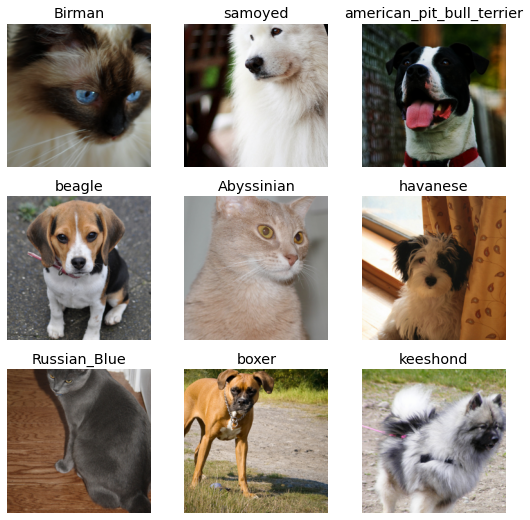

In [17]:
dls.show_batch()

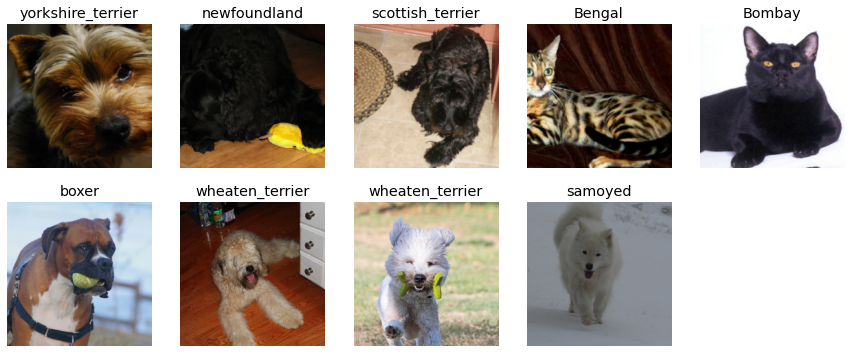

In [18]:
dls.show_batch(nrows=2, ncols =5)

In [19]:
pet1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items = get_image_files,
                 splitter = RandomSplitter(seed=42), 
                 get_y = using_attr(RegexLabeller("(.+)_\d+.jpg$"), "name"),
                 item_tfms = Resize(460),
                 batch_tfms = aug_transforms(size=224, min_scale=0.75))
dls = pet1.dataloaders(path/"images")

In [ ]:
#We use a summary method
pet1.summary(path/'images')

In [21]:
learn = cnn_learner(dls, resnet34, metrics = error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.504581,0.369271,0.118403,02:11


epoch,train_loss,valid_loss,error_rate,time
0,0.534102,0.307119,0.100135,02:35
1,0.324959,0.248455,0.079161,02:34


In [22]:
x,y = dls.one_batch()

In [23]:
x

TensorImage([[[[-0.1466, -0.1382, -0.0762,  ..., -0.4879, -0.3077, -0.2212],
          [-0.0229,  0.0195, -0.0079,  ..., -0.2740,  0.0282,  0.1694],
          [-0.1836, -0.1280, -0.0352,  ..., -0.0983,  0.2231,  0.3608],
          ...,
          [-1.0409, -0.9183, -0.8401,  ...,  0.8692,  0.8454,  0.3408],
          [-1.0350, -0.9561, -0.9091,  ...,  0.9229,  1.1094,  0.9214],
          [-1.0444, -1.0242, -1.0799,  ...,  0.9707,  1.0285,  1.0474]],

         [[ 0.0623,  0.0523,  0.0940,  ..., -0.8082, -0.6083, -0.5235],
          [ 0.1549,  0.1745,  0.1609,  ..., -0.5132, -0.2140, -0.0810],
          [ 0.0903,  0.1075,  0.1209,  ..., -0.3447, -0.0269,  0.0672],
          ...,
          [-0.9882, -0.8981, -0.8498,  ...,  0.6454,  0.7328,  0.2735],
          [-0.9878, -0.9586, -0.9148,  ...,  0.7454,  0.9979,  0.8398],
          [-1.0202, -1.0632, -1.0516,  ...,  0.8147,  0.8595,  0.8513]],

         [[ 0.5615,  0.5664,  0.6351,  ..., -0.7403, -0.6105, -0.5527],
          [ 0.6368,  0.69

In [24]:
y

TensorCategory([18, 19, 28, 13, 20, 23, 35, 10, 26, 36, 18,  4, 28, 34, 28, 35, 10,  8, 33, 22, 11, 10, 10,  7, 20, 21, 27, 28, 17, 10, 32,  1, 32,  4,  1, 27,  2,  6, 29, 32,  9, 34,  2, 13,  0,  8,  6, 16,
        27, 26, 11, 30, 28,  8, 25, 33, 25,  9, 17,  5, 17,  0, 18, 20], device='cuda:0')

In [25]:
len(y)

64

In [26]:
pred,_ = learn.get_preds(dl =[(x,y)])
pred[0]

TensorBase([3.9810e-06, 3.2883e-04, 1.0646e-04, 4.1840e-06, 3.4788e-06, 2.9618e-05, 9.5234e-06, 2.4972e-05, 2.4316e-05, 2.3610e-06, 1.4945e-05, 1.4474e-05, 2.4530e-03, 8.5375e-05, 1.2542e-03, 3.6953e-04,
        2.1768e-05, 4.5921e-06, 9.7595e-01, 1.1558e-02, 6.0611e-03, 1.1133e-04, 6.5834e-04, 7.2781e-05, 3.7566e-06, 1.2413e-04, 2.4236e-05, 1.7576e-04, 4.7036e-05, 4.6919e-06, 2.7770e-04, 8.8843e-06,
        2.6935e-06, 1.6183e-05, 6.3738e-05, 1.4555e-05, 6.7757e-05])

In [27]:
len(pred[0])

37

In [28]:
pred[0].sum()

TensorBase(1.)

In [29]:
x,y = dls.one_batch()

In [30]:
x

TensorImage([[[[ 2.0308e+00,  2.0571e+00,  2.0849e+00,  ...,  2.4243e-01,  2.7936e-01,  2.9541e-01],
          [ 2.0241e+00,  2.0431e+00,  2.0679e+00,  ...,  3.0464e-01,  3.2294e-01,  2.9059e-01],
          [ 2.0421e+00,  2.0440e+00,  2.0431e+00,  ...,  3.1656e-01,  3.1060e-01,  2.5677e-01],
          ...,
          [ 2.2086e+00,  2.2222e+00,  2.2177e+00,  ..., -1.3585e-01, -1.5658e-01, -1.0763e-01],
          [ 2.2146e+00,  2.2135e+00,  2.2089e+00,  ..., -1.3407e-01, -1.5172e-01, -1.1277e-01],
          [ 2.2277e+00,  2.2016e+00,  2.2342e+00,  ..., -1.1382e-01, -1.1142e-01, -1.1874e-01]],

         [[ 2.2240e+00,  2.2619e+00,  2.2656e+00,  ..., -7.8908e-01, -7.6668e-01, -7.6055e-01],
          [ 2.2172e+00,  2.2371e+00,  2.2521e+00,  ..., -7.6947e-01, -7.5233e-01, -7.5966e-01],
          [ 2.2356e+00,  2.2357e+00,  2.2232e+00,  ..., -7.6554e-01, -7.6855e-01, -7.7673e-01],
          ...,
          [ 2.3768e+00,  2.3250e+00,  2.3281e+00,  ..., -1.1288e+00, -1.1558e+00, -1.1069e+00],
   

In [31]:
#The dependent variable is Y which is he labeled data 
y

TensorCategory([22, 12,  6, 30, 20, 30, 27, 24, 35, 30, 27, 11,  1, 27, 36, 14, 20,  6,  3, 27, 24, 10, 10, 33,  8, 26, 17, 27, 21,  9,  1, 22, 14,  1, 11,  8, 11, 14, 30, 17, 20, 10, 20, 18, 13,  8, 15,  5,
         3, 34, 29,  7, 17, 31, 18,  7, 25, 23, 10, 34, 32, 31,  7, 15], device='cuda:0')

In [32]:
len(y)

64

In [33]:
learn.get_preds()

(TensorBase([[1.5806e-06, 1.5715e-06, 7.8379e-05,  ..., 1.0637e-05, 3.8086e-06, 2.1385e-04],
         [6.5790e-06, 4.6498e-04, 5.4503e-07,  ..., 7.5337e-07, 6.2808e-07, 7.0104e-06],
         [4.0081e-06, 6.1273e-05, 4.5391e-07,  ..., 1.0796e-03, 7.2719e-06, 9.8823e-05],
         ...,
         [6.8199e-07, 2.0932e-05, 3.2796e-11,  ..., 1.8908e-11, 3.4991e-10, 4.7573e-10],
         [1.8097e-07, 1.4671e-04, 2.0763e-07,  ..., 2.1522e-06, 6.2419e-07, 1.0902e-06],
         [1.3362e-07, 2.3881e-06, 8.3068e-06,  ..., 2.0194e-06, 4.8589e-06, 5.7986e-07]]),
 TensorCategory([28,  6, 29,  ...,  5, 20, 25]))

In [34]:
preds,_ = learn.get_preds()

In [35]:
preds

TensorBase([[1.5806e-06, 1.5715e-06, 7.8379e-05,  ..., 1.0637e-05, 3.8086e-06, 2.1385e-04],
        [6.5790e-06, 4.6498e-04, 5.4503e-07,  ..., 7.5337e-07, 6.2808e-07, 7.0104e-06],
        [4.0081e-06, 6.1273e-05, 4.5391e-07,  ..., 1.0796e-03, 7.2719e-06, 9.8823e-05],
        ...,
        [6.8199e-07, 2.0932e-05, 3.2796e-11,  ..., 1.8908e-11, 3.4991e-10, 4.7573e-10],
        [1.8097e-07, 1.4671e-04, 2.0763e-07,  ..., 2.1522e-06, 6.2419e-07, 1.0902e-06],
        [1.3362e-07, 2.3881e-06, 8.3068e-06,  ..., 2.0194e-06, 4.8589e-06, 5.7986e-07]])

In [36]:
preds[1][0]

TensorBase(6.5790e-06)

In [37]:
sum = preds.sum()

In [38]:
len(preds[0]), preds[0].sum()

(37, TensorBase(1.0000))

In [39]:
acts = torch.randn((6,2)) * 2

In [40]:
acts

tensor([[ 0.1560, -1.9368],
        [-0.6164,  1.1047],
        [-2.0798, -2.1778],
        [ 1.6429, -3.7728],
        [-1.2445, -2.9512],
        [ 1.8062, -0.5881]])

In [41]:
sum = acts.sigmoid()

In [42]:
sum

tensor([[0.5389, 0.1260],
        [0.3506, 0.7511],
        [0.1111, 0.1018],
        [0.8379, 0.0225],
        [0.2237, 0.0497],
        [0.8589, 0.3571]])

In [43]:
(acts[:,0] - acts[:,1]).sigmoid()

tensor([0.8902, 0.1517, 0.5245, 0.9956, 0.8464, 0.9164])

In [44]:
#Lets define a softmax activation  function 
def softmax(x):
  return exp(x)/ exp(x).sum(dim=1, keepdim =True)

In [45]:
softmax_activations = torch.softmax(acts, dim=1)

In [46]:
softmax_activations

tensor([[0.8902, 0.1098],
        [0.1517, 0.8483],
        [0.5245, 0.4755],
        [0.9956, 0.0044],
        [0.8464, 0.1536],
        [0.9164, 0.0836]])

In [47]:
import numpy as np 

In [48]:
x = np.exp(6)

In [49]:
y =np.exp(7)

In [50]:
z = np.exp(8)

In [51]:
r = np.exp(9)

In [52]:
out = x + y + z + r

In [53]:
out

12584.103866538306

In [54]:
div1 = x /out

In [55]:
div1

0.03205860328008499

In [56]:
div2 = y/out

In [57]:
div2

0.08714431874203256

In [58]:
div3 = r /out

In [59]:
div3

0.6439142598879724

In [60]:
div4 = z /out

In [61]:
div4

0.23688281808991013

In [62]:
sumOne = div1 + div2 + div3 + div4

In [63]:
sumOne

1.0

In [64]:
ans = -1.18 * np.log(0.57)

In [65]:
ans

0.6633003234211787

In [66]:
x11 =np.exp(1.04)

In [67]:
x11

2.82921701435156

In [68]:
x12 = np.exp(0.0)

In [69]:
x12

1.0

In [70]:
x13 = np.exp(0.14)

In [71]:
x13

1.1502737988572274

In [72]:
sum = x11 + x12 + x13

In [73]:
sum

4.979490813208788

In [74]:
div1 = x11 /sum 

In [75]:
div2 = x12/sum

In [76]:
div3 = x13/sum

In [77]:
div1 + div2 + div3

0.9999999999999999

In [78]:
x1 =  np.exp(1.04)

In [79]:
x2 = np.exp(0.0)

In [80]:
x3 = np.exp(0.14)

In [81]:
sum = x1 + x2 + x3

In [82]:
sum 

4.979490813208788

In [83]:
div1 = x1/sum 

In [84]:
div1

0.5681739600456076

In [85]:
div2 = x2 /sum 
div2

0.20082374634518088

In [86]:
div3 = x3 /sum
div3

0.23100229360921143

In [87]:
prob = -1 * np.log(0.57)

In [88]:
prob

0.5621189181535413

In [89]:
x,y = dls.one_batch()

In [90]:
y

TensorCategory([35,  3, 20,  4,  8, 22,  6, 33, 12, 29, 11, 15, 10, 20, 14, 34, 33, 14, 10,  4,  6,  8, 22, 11, 12, 11, 12, 34,  4, 21,  8,  1, 14, 24,  0, 28, 28, 12,  7, 10, 20, 28, 10, 17, 22, 36, 23,  7,
        31, 25, 34, 20,  9, 27, 20,  4, 22,  5, 36, 33, 30, 35, 23, 13], device='cuda:0')

The dependent variables are the labels while the independent variables and the features ##

In [91]:
preds,_ = learn.get_preds()

In [92]:
len = preds[0]

In [93]:
len.shape

torch.Size([37])

In [94]:
len.sum()

TensorBase(1.0000)

In [95]:
acts = torch.randn((6,2)) * 2

In [96]:
acts

tensor([[-1.8278, -1.3738],
        [-0.1449, -2.4355],
        [-1.4474, -0.2974],
        [ 1.8805,  3.0474],
        [ 1.2489,  0.4982],
        [-1.6813,  1.4027]])

In [97]:
sig =  acts.sigmoid()

In [98]:
sig.sum()

tensor(5.6824)

In [99]:
activ = (acts[:,0] - acts[:,1]).sigmoid()

In [100]:
#Softmax function 
def softmax(x):
  return exp(x)/exp(x).sum(dim =1, keepDim=True)

In [101]:
sm_act = torch.softmax(acts, dim=1)

In [102]:
sm_act

tensor([[0.3884, 0.6116],
        [0.9081, 0.0919],
        [0.2405, 0.7595],
        [0.2374, 0.7626],
        [0.6793, 0.3207],
        [0.0438, 0.9562]])

Softmax is the multicategory equivalent of sigmoid, we use it when we have more than two categories and the probalities of the categories must add up to one 

In [103]:
def mnist_loss(inputs, targets):
  inputs = inputs.sigmoid()
  return (torch.where(targets==1,1- inputs, input)).mean()

In [104]:
targ = tensor([0,1,0,1,1,0])

In [105]:
index = range(6) 
sm_act[index,targ]

tensor([0.3884, 0.0919, 0.2405, 0.7626, 0.3207, 0.0438])

In [106]:
-sm_act[range(6), targ]

tensor([-0.3884, -0.0919, -0.2405, -0.7626, -0.3207, -0.0438])

In [107]:
F.nll_loss(sm_act, targ, reduction='none')

tensor([-0.3884, -0.0919, -0.2405, -0.7626, -0.3207, -0.0438])

In [108]:
#Taking the log 

In [108]:
def mnist_loss(inputs, targets):
  inputs.sigmoid()
  return torch.where(target== 1, 1-inputs , inputs).mean()

In [110]:
tensor = [0,1,0,1,1,0]
target = torch.tensor(tensor)

In [112]:
sm_act #These are the softmax activations

tensor([[0.3884, 0.6116],
        [0.9081, 0.0919],
        [0.2405, 0.7595],
        [0.2374, 0.7626],
        [0.6793, 0.3207],
        [0.0438, 0.9562]])

In [114]:
#Tensor indexing
index = range(6) 
sm_act[index,target]

tensor([0.3884, 0.0919, 0.2405, 0.7626, 0.3207, 0.0438])

In [115]:
-sm_act[index,target]

tensor([-0.3884, -0.0919, -0.2405, -0.7626, -0.3207, -0.0438])

In [119]:
#Pytorch negative log likelihood
F.nll_loss(sm_act,target,reduction='none')

tensor([-0.3884, -0.0919, -0.2405, -0.7626, -0.3207, -0.0438])

/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:74: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  ../aten/src/ATen/native/RangeFactories.cpp:23.)
  x = torch.linspace(min,max)


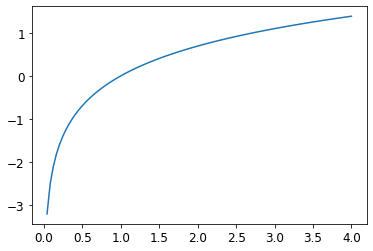

In [122]:
fastbook.plot_function(torch.log, min = 0, max = 4)

In [123]:
loss_func = nn.CrossEntropyLoss()

In [124]:
loss_func(sm_act, target) #Pytorch loss function accessible through a class instance

tensor(0.9304)

In [126]:
F.cross_entropy(sm_act, target)#Pytorch loss function accessible through methods 

tensor(0.9304)

In [127]:
nn.CrossEntropyLoss(reduction='none')(sm_act, target)

tensor([0.8109, 1.1823, 0.9860, 0.4646, 0.8885, 1.2500])

In [ ]:
#Model interpretation